In [40]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats as stats
import seaborn as sns
from scipy.stats import rv_discrete

from src.code.simulation.galton_watson import GaltonWatson, SimulateurGaltonWatson
from src.code.simulation.probability_distributions import (
    create_distributions,
    create_distributions_df,
)
from src.code.simulation.utils import plot_zn_distribution, test_loi_exponentielle
from src.code.simulation.yaglom import simulation_yaglom, simulation_yaglom_toutes_lois
from src.config.config import seed
from src.utils.utils import init_notebook

In [31]:
init_notebook(seed)

# Théorème de Yaglom

## Mise au propre Yaglom

In [3]:
distributions = create_distributions()

In [4]:
alpha = 0.05
nb_processus = 30_000
taille_pas = 2
nb_repetitions = 100

In [23]:
p_value_dict, ks_dict, lambda_dict = simulation_yaglom_toutes_lois(distributions, nb_processus, taille_pas, nb_repetitions)

In [24]:
p_value_df = pd.DataFrame(p_value_dict)
ks_df = pd.DataFrame(ks_dict)
lambda_df = pd.DataFrame(lambda_dict)

In [25]:
p_value_df.to_csv("data/results/p-value-evolution.csv", index=False)
ks_df.to_csv("data/results/ks-evolution.csv", index=False)
lambda_df.to_csv("data/results/lambda-evolution.csv", index=False)

In [5]:
p_value_df = pd.read_csv("data/results/p-value-evolution.csv")
ks_df = pd.read_csv("data/results/ks-evolution.csv")
lambda_df = pd.read_csv("data/results/lambda-evolution.csv")

In [6]:
distributions_df = create_distributions_df()

In [7]:
lambda_array = np.array(distributions_df["Lambda théorique loi exponentielle Z_n / n"])

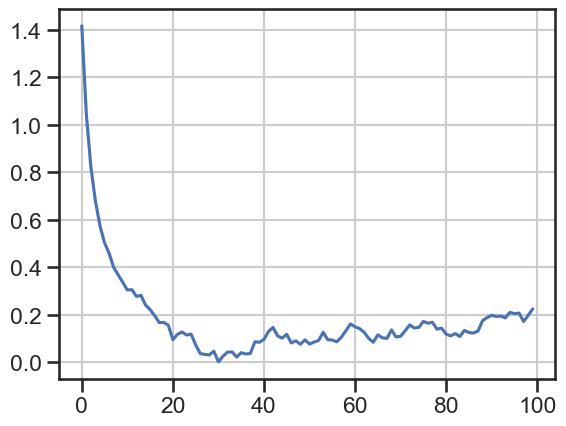

In [32]:
plt.plot(
    np.abs(lambda_df["Hyper-Géométrique (N=100, n=10, p=0.1)"] - lambda_array[-1])
)

<Axes: >

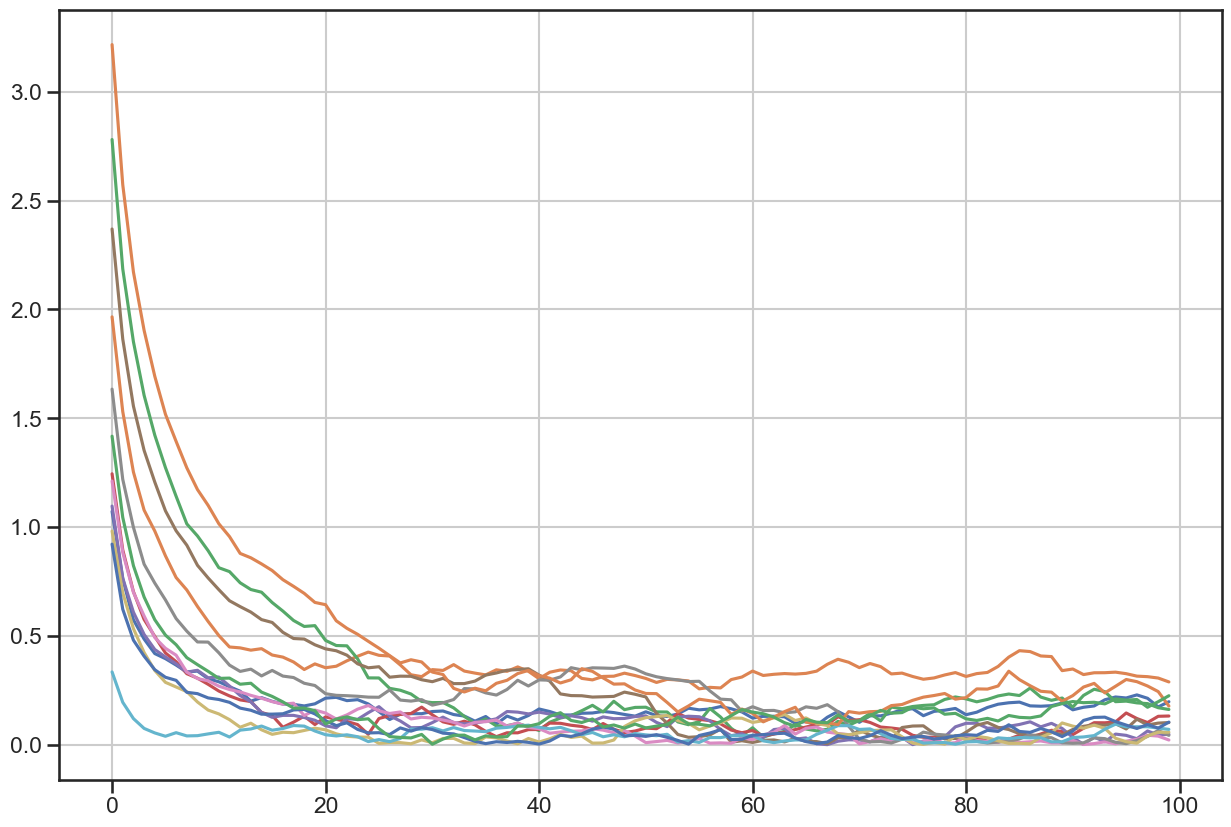

In [60]:
abs(lambda_df - lambda_array).rolling(window=periode_lissage).mean().plot(figsize=(15, 10), legend=None)

## Graphiques

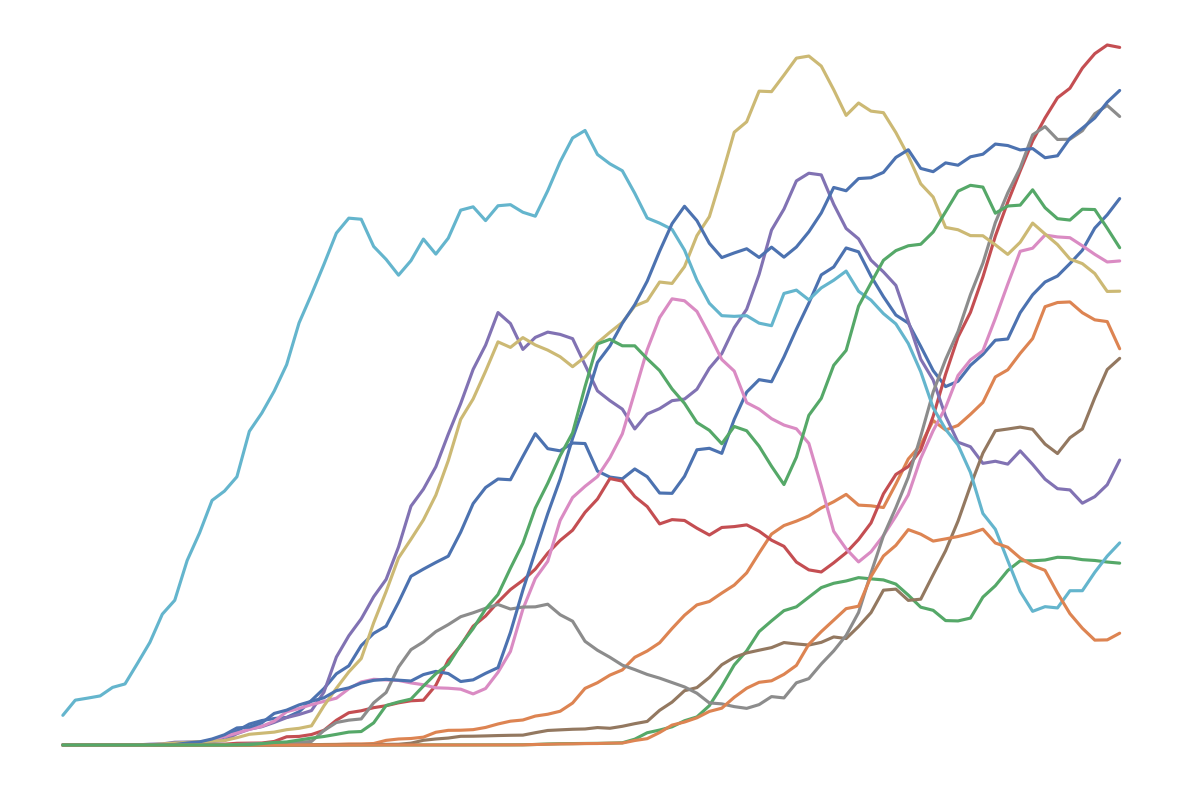

In [55]:
periode_lissage = 15
p_value_df.rolling(window=periode_lissage).mean().plot(figsize=(15, 10), legend=None)

plt.plot(
    list(range(periode_lissage, nb_repetitions)),
    [alpha for _ in range(periode_lissage, nb_repetitions)],
    label=r"$\alpha = 0.05$",
    color="black",
    linestyle="dashed",
)
plt.grid(False)

# Remove both x and y axes
plt.axis('off')
# Hide major ticks and labels on the x-axis
plt.tick_params(axis='x', which='major', length=0, labelbottom=False)

# Hide major ticks and labels on the y-axis
plt.tick_params(axis='y', which='major', length=0, labelleft=False)
# plt.savefig("assets/img/p-values-evolution-all-laws.svg")

plt.savefig("assets/img/p-values-evolution-all-laws-transparent.png", transparent=True)

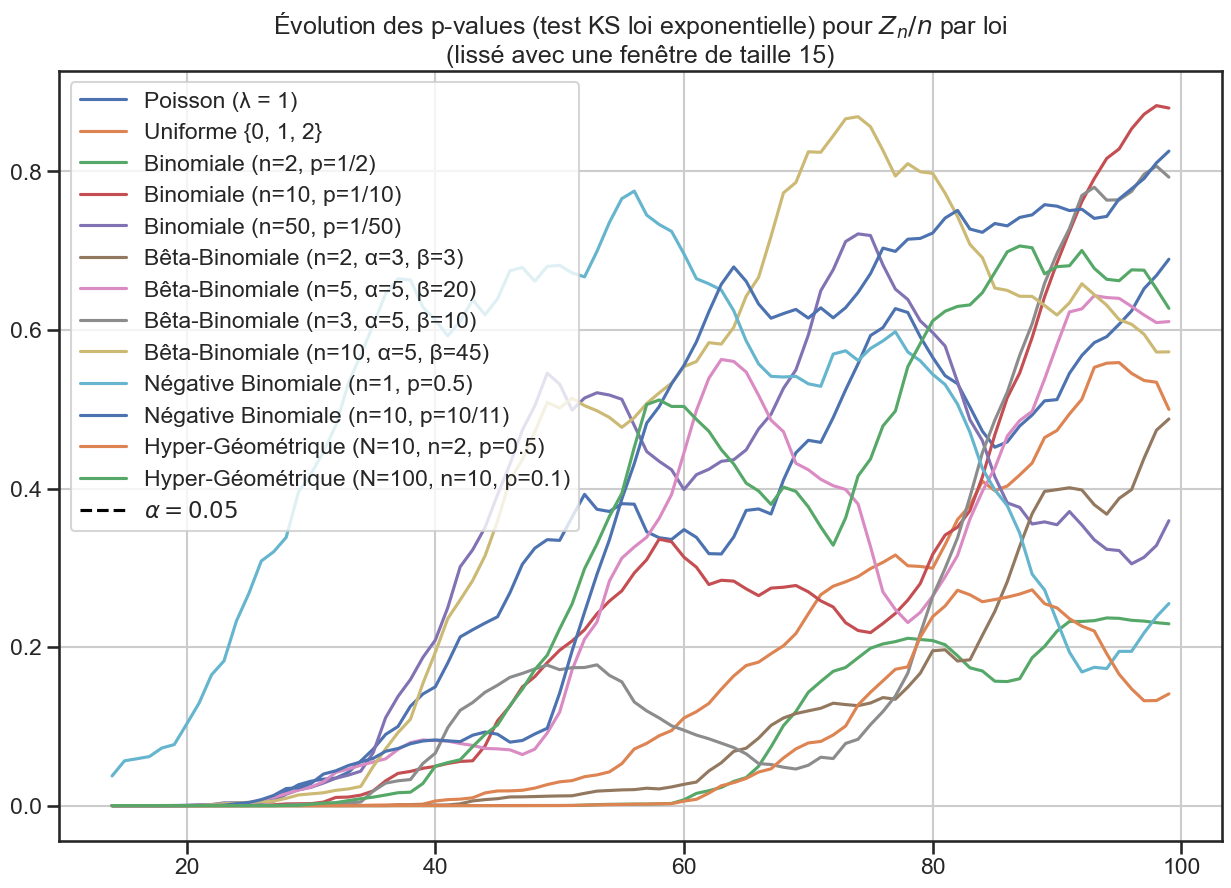

In [56]:
periode_lissage = 15
p_value_df.rolling(window=periode_lissage).mean().plot(figsize=(15, 10))

plt.title(
    "Évolution des p-values (test KS loi exponentielle) pour $Z_n / n$ par loi"
    f"\n(lissé avec une fenêtre de taille {periode_lissage})"
)
plt.plot(
    list(range(periode_lissage, nb_repetitions)),
    [alpha for _ in range(periode_lissage, nb_repetitions)],
    label=r"$\alpha = 0.05$",
    color="black",
    linestyle="dashed",
)
plt.legend()
# plt.savefig("assets/img/p-values-evolution-all-laws.png")
# plt.savefig("assets/img/p-values-evolution-all-laws.svg")

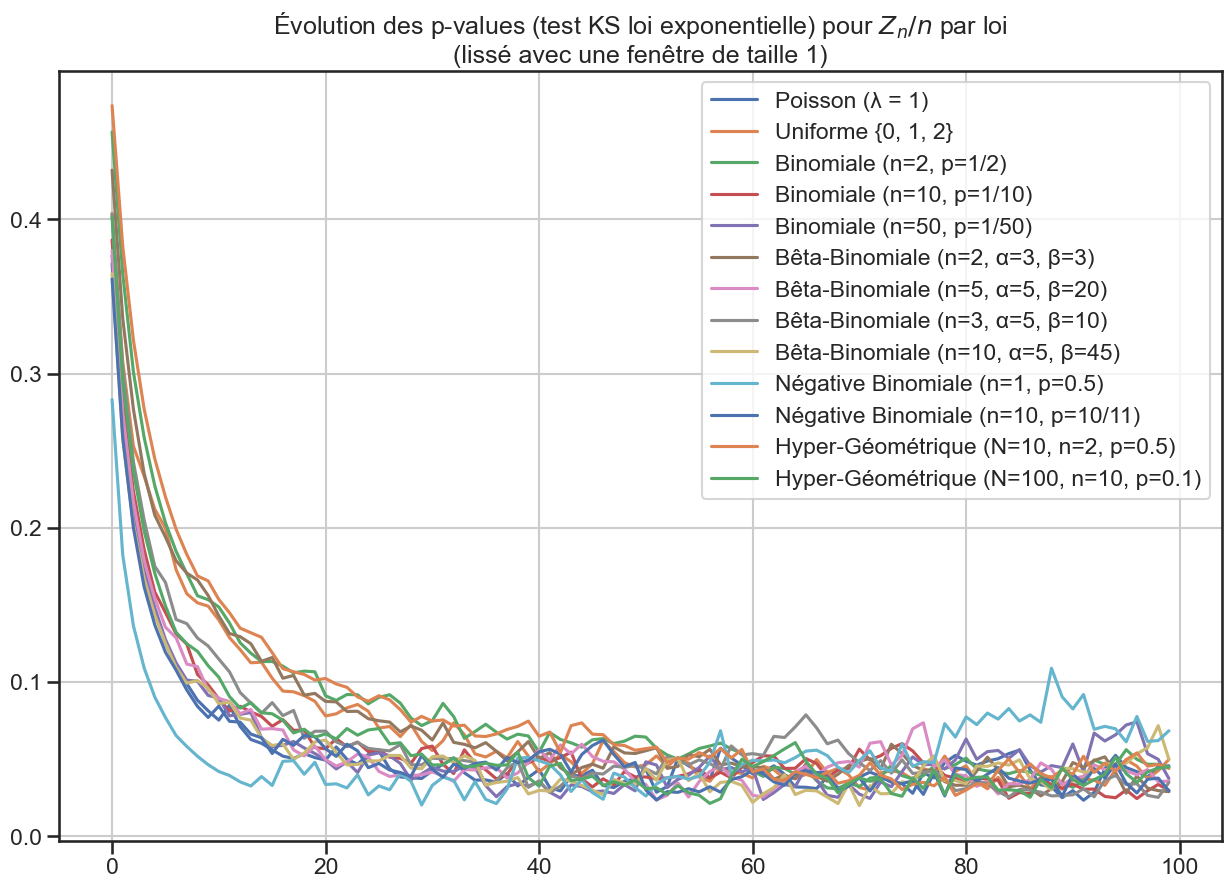

In [57]:
periode_lissage = 1
ks_df.rolling(window=periode_lissage).mean().plot(figsize=(15, 10))

plt.title(
    "Évolution des p-values (test KS loi exponentielle) pour $Z_n / n$ par loi"
    f"\n(lissé avec une fenêtre de taille {periode_lissage})"
)
plt.legend()
# plt.savefig("assets/img/p-values-evolution-all-laws.png")
# plt.savefig("assets/img/p-values-evolution-all-laws.svg")

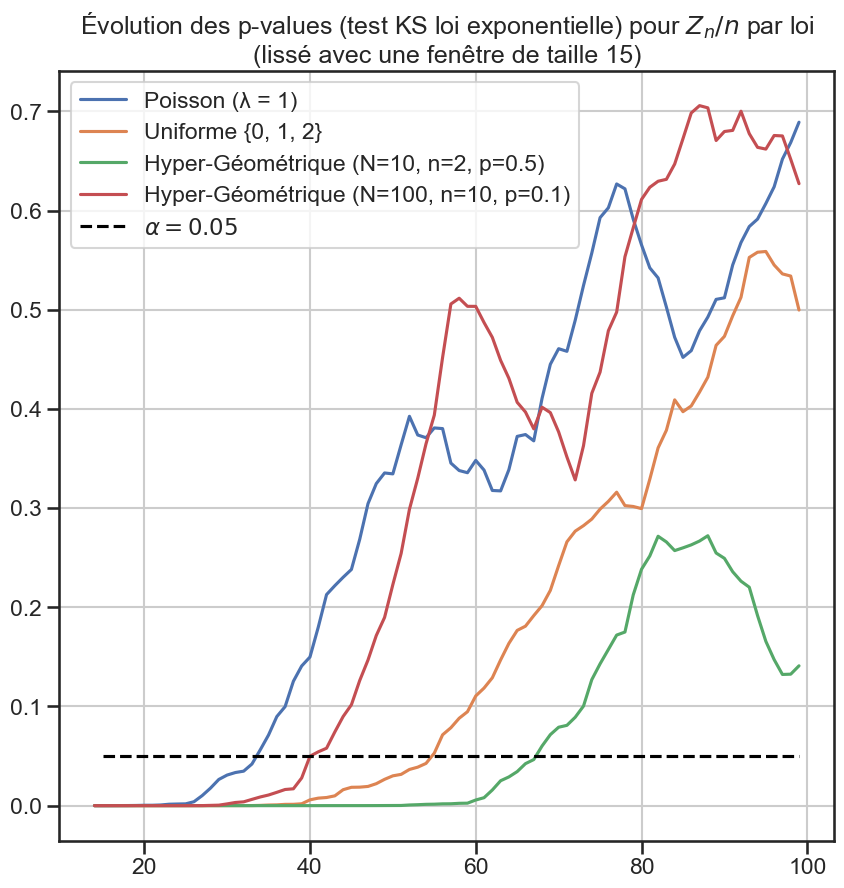

In [35]:
periode_lissage = 15

p_value_df[
    [
        "Poisson (λ = 1)",
        "Uniforme {0, 1, 2}",
        "Hyper-Géométrique (N=10, n=2, p=0.5)",
        "Hyper-Géométrique (N=100, n=10, p=0.1)",
    ]
].rolling(window=periode_lissage).mean().plot(figsize=(10, 10))

plt.title(
    "Évolution des p-values (test KS loi exponentielle) pour $Z_n / n$ par loi"
    f"\n(lissé avec une fenêtre de taille {periode_lissage})"
)
plt.plot(
    list(range(periode_lissage, nb_repetitions)),
    [alpha for _ in range(periode_lissage, nb_repetitions)],
    label=r"$\alpha = 0.05$",
    color="black",
    linestyle="dashed",
)
plt.legend()

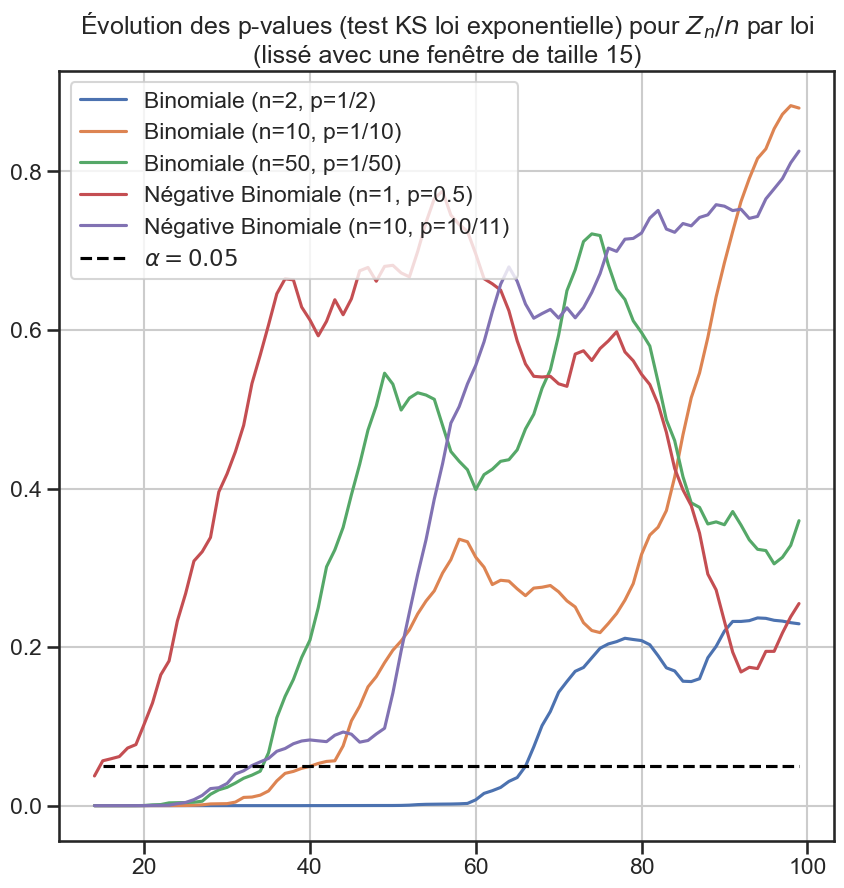

In [36]:
periode_lissage = 15

p_value_df[
    [
        "Binomiale (n=2, p=1/2)",
        "Binomiale (n=10, p=1/10)",
        "Binomiale (n=50, p=1/50)",
        "Négative Binomiale (n=1, p=0.5)",
        "Négative Binomiale (n=10, p=10/11)",
    ]
].rolling(window=periode_lissage).mean().plot(figsize=(10, 10))

plt.title(
    "Évolution des p-values (test KS loi exponentielle) pour $Z_n / n$ par loi"
    f"\n(lissé avec une fenêtre de taille {periode_lissage})"
)
plt.plot(
    list(range(periode_lissage, nb_repetitions)),
    [alpha for _ in range(periode_lissage, nb_repetitions)],
    label=r"$\alpha = 0.05$",
    color="black",
    linestyle="dashed",
)
plt.legend()

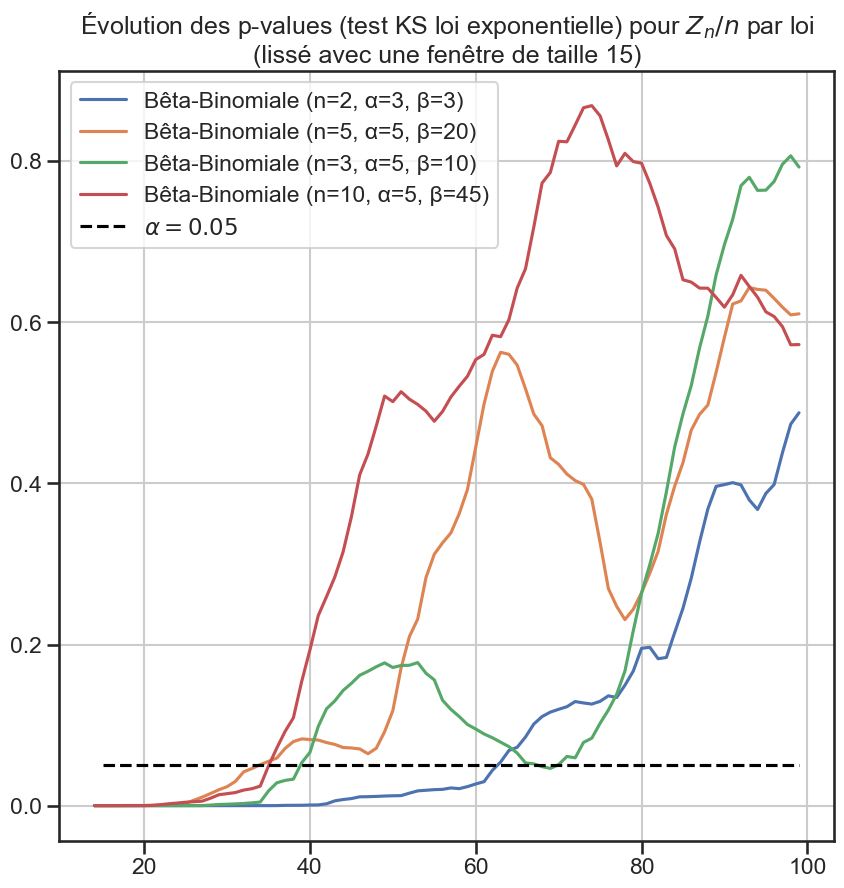

In [37]:
periode_lissage = 15

p_value_df[
    [
        "Bêta-Binomiale (n=2, α=3, β=3)",
        "Bêta-Binomiale (n=5, α=5, β=20)",
        "Bêta-Binomiale (n=3, α=5, β=10)",
        "Bêta-Binomiale (n=10, α=5, β=45)",
    ]
].rolling(window=periode_lissage).mean().plot(figsize=(10, 10))

plt.title(
    "Évolution des p-values (test KS loi exponentielle) pour $Z_n / n$ par loi"
    f"\n(lissé avec une fenêtre de taille {periode_lissage})"
)
plt.plot(
    list(range(periode_lissage, nb_repetitions)),
    [alpha for _ in range(periode_lissage, nb_repetitions)],
    label=r"$\alpha = 0.05$",
    color="black",
    linestyle="dashed",
)
plt.legend()

In [38]:
def plot_p_value(nom_loi: str) -> None:
    """Affiche l'évolution de la p-value"""
    plt.plot(p_value_dict[nom_loi], label="p-value")
    plt.plot(
        list(range(nb_repetitions)),
        [alpha for _ in range(nb_repetitions)],
        label=r"$\alpha = 0.05$",
    )
    plt.legend()

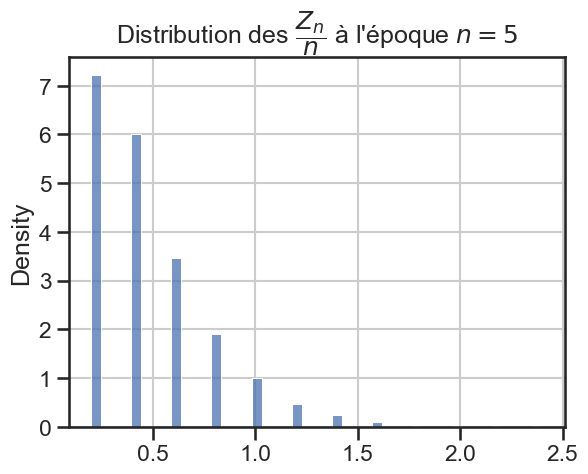

p_value = 0.0


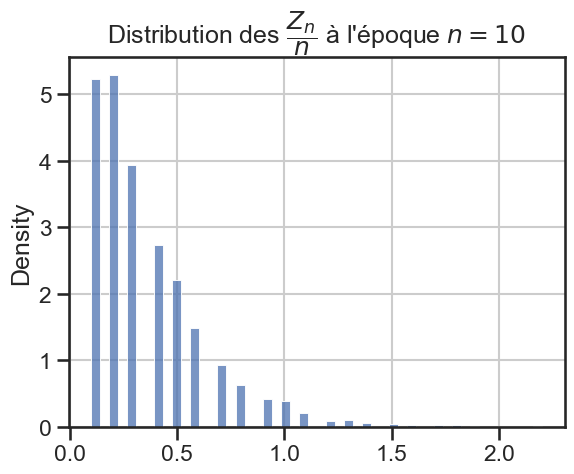

p_value = 9.622011434558595e-152


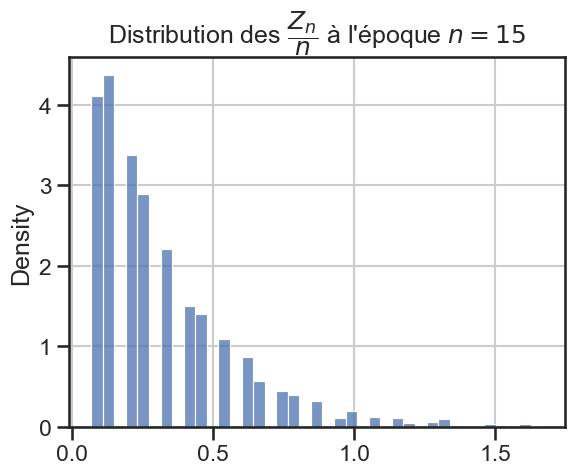

p_value = 2.827435930932723e-70


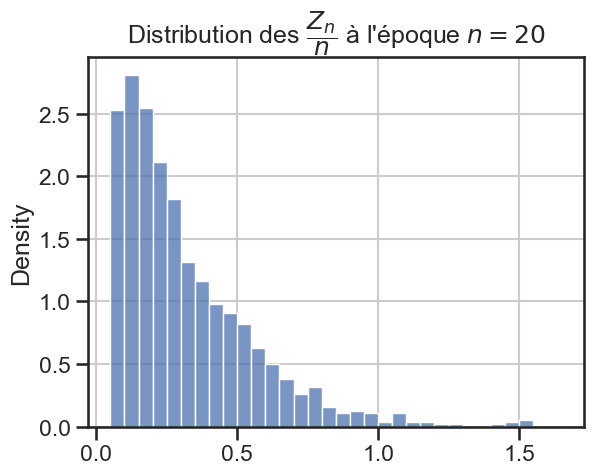

p_value = 2.8210546622397323e-39


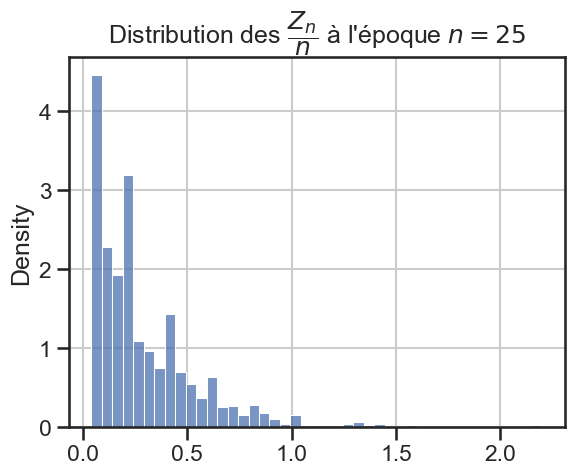

p_value = 3.2216117932465623e-24


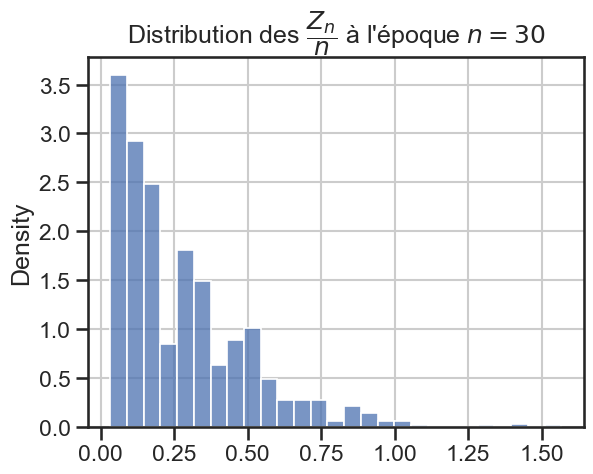

p_value = 7.887052073352042e-20


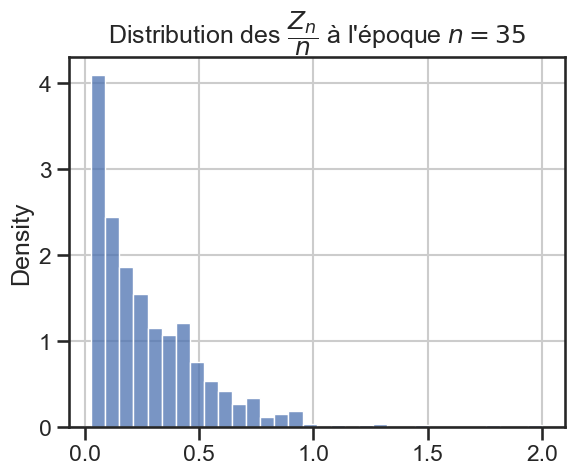

p_value = 3.461167774975927e-12


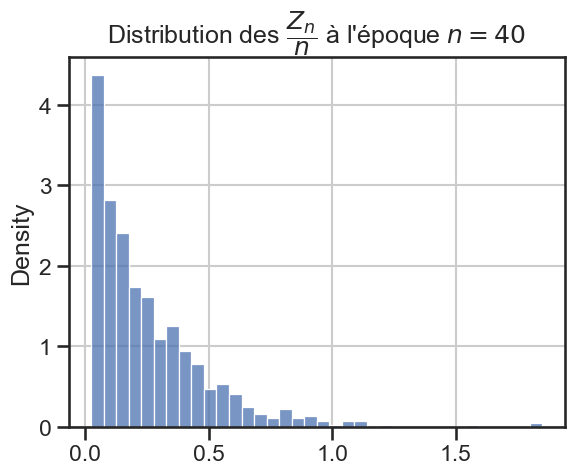

p_value = 1.7994986428624622e-12


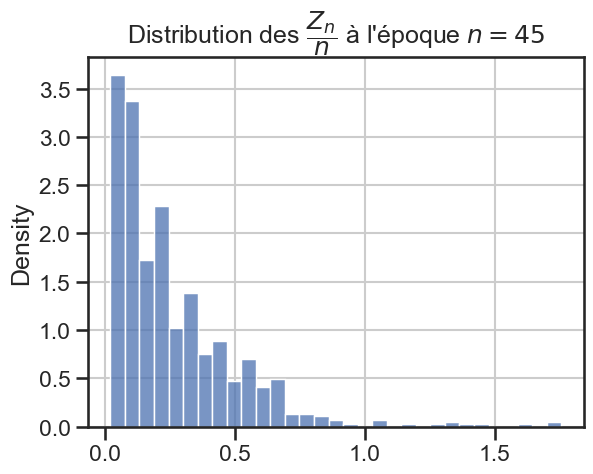

p_value = 7.08994488987903e-08


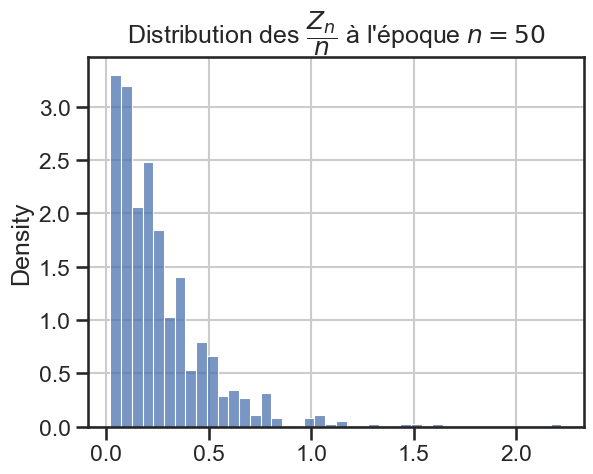

p_value = 3.728747180083857e-08


In [43]:
sim = SimulateurGaltonWatson(
    distributions["Hyper-Géométrique (N=10, n=2, p=0.5)"], nb_processus=10_000
)
taille_pas = 5
nb_repetitions = 10
taille_echantillon = 100

for i in range(nb_repetitions):
    sim.simule(nb_epoques=taille_pas)
    sim.retire_processus_eteints()

    zn_sur_n = sim.get_zn_sur_n()
    zn_sur_n_sample = zn_sur_n[taille_echantillon:]

    plt.title(
        "Distribution des $\dfrac{Z_n}{n}$ à l'époque $n = "
        + str((i + 1) * taille_pas)
        + "$"
    )
    sns.histplot(zn_sur_n_sample, stat="density")
    plt.savefig(f"data/results/distribution/hyper-geo-{(i + 1) * taille_pas}.png")
    plt.show()

    p_value, statistique_ks = test_loi_exponentielle(zn_sur_n)
    print(f"{p_value = }")